In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)

In [3]:
plot_y = (plot_x - 2.5) ** 2 - 1

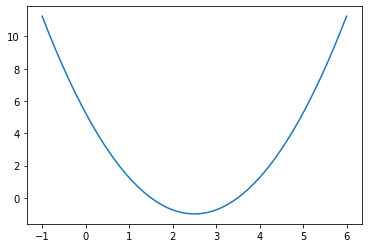

In [4]:
plt.plot(plot_x, plot_y)

In [5]:
# gradient
def gradient_j(theta):
    return 2 * (theta - 2.5)

# loss function
def J(theta):
    return (theta - 2.5) ** 2 - 1

In [6]:
theta = 0.0
eta = 0.1

epsilon = 1e-8
while True:
    gradient = gradient_j(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if (abs(J(theta) - J(last_theta)) < epsilon):
        break

theta, J(theta)

(2.499891109642585, -0.99999998814289)

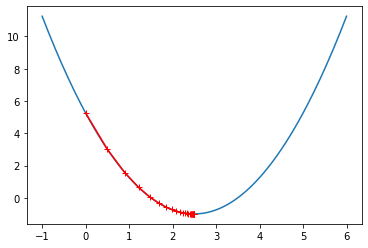

In [7]:
theta = 0.0
theta_history = [theta]
eta = 0.1

epsilon = 1e-8
while True:
    gradient = gradient_j(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if (abs(J(theta) - J(last_theta)) < epsilon):
        break

plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker="+")

## 批量梯度下降gradient descent in linear regression

In [8]:
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)
x, y

(array([0.58224136, 0.23205972, 0.65628982, 1.5435815 , 1.57260518,
        1.09067371, 1.79854155, 1.03316017, 0.30191356, 0.97050927,
        1.87744296, 0.61068673, 0.35358356, 1.62076106, 0.33762091,
        0.54593685, 1.49606975, 1.59858481, 1.03012013, 1.30944847,
        1.74091715, 0.99374056, 0.93855167, 1.15406958, 0.45616188,
        0.43272857, 0.25532268, 0.98465112, 0.77079648, 1.87662321,
        1.05368396, 1.43711382, 1.33639707, 0.87911165, 0.56209622,
        0.17363763, 0.05457818, 1.91152863, 0.67772246, 1.13860812,
        0.58961975, 1.94432088, 0.69499116, 1.35926032, 1.55873516,
        1.45787897, 1.16049947, 1.07027369, 1.48271975, 1.55426054,
        0.6706243 , 0.76663134, 1.86799027, 0.82686225, 0.29069692,
        0.04369369, 0.10364753, 0.76818108, 1.84270992, 1.88156553,
        1.21017447, 0.1648453 , 1.00624407, 0.36535288, 0.5064913 ,
        1.83315348, 0.5536707 , 1.96353278, 0.71060929, 0.26275548,
        0.21459022, 0.89759268, 1.18013574, 0.66

In [9]:
X = x.reshape(-1, 1)

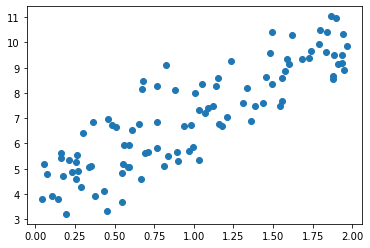

In [10]:
plt.scatter(x, y)

In [11]:
# 目标函数
def J(theta, x_b, y):
    try:
        return np.sum(y - x_b.dot(theta)) ** 2 / len(x_b)
    except:
        return float('inf')

In [12]:
# 求导
def dJ(theta, x_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(x_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (x_b.dot(theta) - y).dot(x_b[:, i])
    return res * 2 / len(x_b)

In [13]:
# 梯度下降
def gradient_descent(x_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, x_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if (abs(J(theta, x_b, y) - J(last_theta, x_b, y)) < epsilon):
            break
        
        i_iter += 1
    
    return theta

In [14]:
x_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.1

gradient_descent(x_b, y, initial_theta, eta)

array([4.11860236, 2.97042124])

## 向量化
return 2 * x_b.T.dot(x_b.dot(theta) - y) / len(x_b)

## 随机梯度下降 Stochastic Gradient Descent

In [15]:
m = 100000

x = np.random.normal(size=m)
x = x.reshape(-1, 1)
y = 4. * 3 + 3. + np.random.normal(0, 3, size=m)

In [16]:
def dJ_sgd(theta, x_b_i, y_i):
    return x_b_i.T.dot(x_b_i.dot(theta) - y_i) * 2

In [17]:
def sgd(x_b, y, initial_theta, n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(x_b))
        gradient = dJ_sgd(theta, x_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta

In [18]:
x_b = np.hstack([np.ones((len(x), 1)), x])
initial_theta = np.zeros(x_b.shape[1])
theta = sgd(x_b, y, initial_theta, n_iters=len(x_b)//3)

In [19]:
theta

array([15.05892543,  0.0461963 ])

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target)

standarScaler = StandardScaler()
standarScaler.fit(boston.data)
x_train_standard = standarScaler.transform(x_train)
x_test_standard = standarScaler.transform(x_test)

In [22]:
sgd_reg = SGDRegressor().fit(x_train_standard, y_train)

In [23]:
sgd_reg.score(x_test_standard, y_test)

0.6901178867595257

In [24]:
sgd_reg = SGDRegressor(n_iter_no_change=100).fit(x_train_standard, y_train)
sgd_reg.score(x_test_standard, y_test)

0.6901070072980782

## 梯度调试

In [25]:
np.random.seed(666)
x = np.random.random(size=(1000, 10))
true_theta = np.arange(1, 12, dtype=float)

In [26]:
x_b = np.hstack([np.ones((len(x), 1)), x])
y = x_b.dot(true_theta) + np.random.normal(size=1000)

In [27]:
x.shape, y.shape

((1000, 10), (1000,))

In [28]:
# 目标函数
def J(theta, x_b, y):
    try:
        return np.sum(y - x_b.dot(theta)) ** 2 / len(x_b)
    except:
        return float('inf')

In [29]:
# 求导
def dJ_math(theta, x_b, y):
    return x_b.T.dot(x_b.dot(theta) - y) * 2. / len(y)

In [30]:
def dJ_debug(theta, x_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, x_b, y) - J(theta_2, x_b, y)) / (2 * epsilon)
    return res

In [31]:
# 梯度下降
def gradient_descent(dJ, x_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, x_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if (abs(J(theta, x_b, y) - J(last_theta, x_b, y)) < epsilon):
            break
        
        i_iter += 1
    
    return theta

In [32]:
x_b = np.hstack([np.ones((len(x), 1)), x])
initial_theta = np.zeros(x_b.shape[1])
eta = 0.01

In [33]:
%time theta = gradient_descent(dJ_debug, x_b, y, initial_theta, eta)
theta

Wall time: 8 ms


array([-1.79417706e+16, -8.97254701e+15, -8.97253774e+15,  3.46628342e+13,
       -8.97253219e+15,  3.46689248e+13,  3.46797610e+13,  3.46657493e+13,
        3.46570121e+13,  3.46668044e+13,  3.46583394e+13])

In [34]:
%time theta = gradient_descent(dJ_math, x_b, y, initial_theta, eta)
theta

Wall time: 1.23 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])